In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("D:\\train.csv")
train = train.replace(r'^\s*$', np.nan, regex=True)

In [3]:
test=pd.read_csv("D:\\test.csv")
test = test.replace(r'^\s*$', np.nan, regex=True)

In [4]:
test.head(5)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.shape

(4209, 377)

In [7]:
train.shape

(4209, 378)

In [8]:
zero_var_col=train.var()[train.var()==0].index.values

C:\Users\Arjun\AppData\Local\Temp/ipykernel_1464/944441584.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zero_var_col=train.var()[train.var()==0].index.values


In [9]:
zero_var_col

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [10]:
train.drop(['ID','X11','X93','X107','X233','X268','X289','X290','X293','X297', 'X330', 'X347'], axis =1, inplace= True)

In [11]:
train.shape

(4209, 366)

In [12]:
train.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [13]:
col_name= train.describe(include=['object']).columns.values

col_name

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
for col in col_name:
     le.fit(train[col].append(test[col]).values)

In [16]:
train[col]=le.transform(train[col])
test[col]=le.transform(test[col])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(0.98,svd_solver="full")


In [18]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,13,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X=train.iloc[:,1:]
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X['X0']=le.fit_transform(X.X0)
X['X1']=le.fit_transform(X.X1)
X['X2']=le.fit_transform(X.X2)
X['X3']=le.fit_transform(X.X3)
X['X4']=le.fit_transform(X.X4)
X['X5']=le.fit_transform(X.X5)
X['X6']=le.fit_transform(X.X6)
X['X8']=le.fit_transform(X.X8)


In [21]:
Y=train['y']

In [22]:
print(X.shape)
print(Y.shape)

(4209, 365)
(4209,)


In [23]:
from sklearn.model_selection import train_test_split
# Choose a random state values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8) 

In [24]:
pca.fit(X,Y)

PCA(n_components=0.98, svd_solver='full')

In [25]:
X_trans=pca.fit_transform(X)

In [26]:
print(X_trans.shape)

(4209, 14)


In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8) 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3367, 365)
(842, 365)
(3367,)
(842,)


In [29]:
xgb_reg= xgb.XGBRegressor(objective ='reg:linear', colsample_bytree= 0.3, alpha=6, n_estimator=20)
model=xgb_reg.fit(x_train,y_train)
print('RMSE= ', sqrt(mean_squared_error(model.predict(x_test),y_test)))

[22:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE=  8.880561503460987


C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


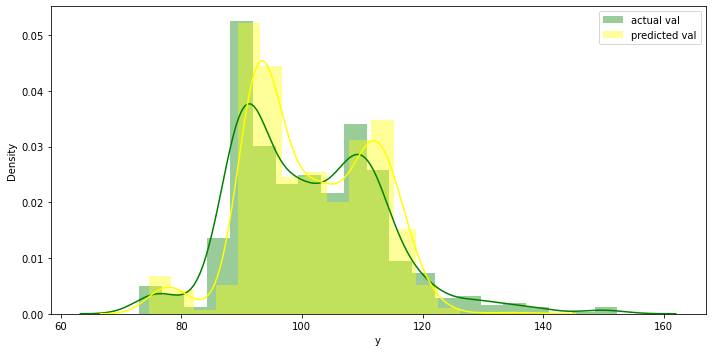

In [30]:
pred_y_test= model.predict(x_test)
plt.figure(figsize=(10,5))
sns.distplot(y_test[y_test<160], color= 'green', label='actual val')
sns.distplot(pred_y_test[pred_y_test<160], color='yellow', label='predicted val')
plt.legend()
plt.tight_layout()

In [31]:
dmatrix_train=xgb.DMatrix(data=X_trans,label=Y)
params={'objective':'reg:linear','colsample_bytree':0.3,'learning_rate':0.3}
model_cv=xgb.cv(dtrain=dmatrix_train,params=params,nfold=3,num_boost_round=50,metrics='rmse',as_pandas=True,seed=7)
model_cv.head()

[22:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,71.174564,0.186807,71.179326,0.500306
1,50.477423,0.164477,50.478355,0.579249
2,36.135533,0.141838,36.188833,0.660990
3,26.384676,0.145785,26.544081,0.738241
4,19.711858,0.155343,20.021483,0.855619


In [32]:
test.drop(['X11','X93','X107','X233','X268','X289','X290','X293','X297', 'X330', 'X347'], axis =1, inplace= True)

In [33]:
test.shape

(4209, 366)

In [34]:
test.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6
count,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12
top,ak,aa,as,c,d,v,g
freq,432,826,1658,1900,4203,246,1073


In [35]:
L=test.drop(columns={'ID'})

In [36]:
L.shape

(4209, 365)

In [37]:
L.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6
count,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12
top,ak,aa,as,c,d,v,g
freq,432,826,1658,1900,4203,246,1073


In [38]:
L['X0']=le.fit_transform(L.X0)
L['X1']=le.fit_transform(L.X1)
L['X2']=le.fit_transform(L.X2)
L['X3']=le.fit_transform(L.X3)
L['X4']=le.fit_transform(L.X4)
L['X5']=le.fit_transform(L.X5)
L['X6']=le.fit_transform(L.X6)

In [39]:
pca.fit(L)

PCA(n_components=0.98, svd_solver='full')

In [40]:
L_trans=pca.fit_transform(L)

In [41]:
L_trans.shape

(4209, 13)

In [42]:
test_pred=model.predict(L)
test_pred

array([ 87.691864, 105.66435 ,  82.53157 , ...,  94.26555 , 108.20008 ,
        91.925804], dtype=float32)

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


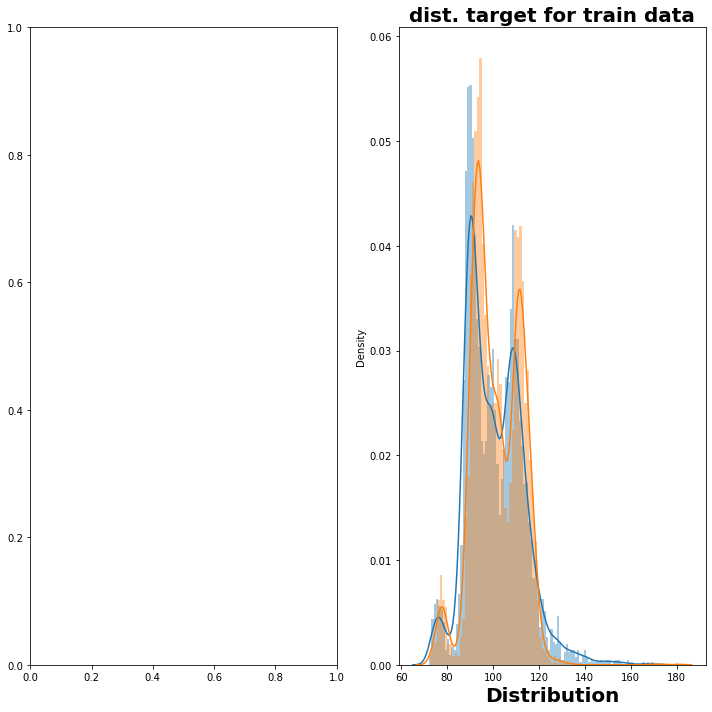

In [43]:
fig, ax=plt.subplots(1,2,figsize=(10,10))

train_plot=sns.distplot(Y[Y<200], bins=100, kde=True, ax=ax[1] )
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_xlabel('Distribution', weight='bold', size= 20)
train_plot.set_title('dist. target for train data',weight='bold',size=15)

test_plot=sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(train_data)', weight='bold', size= 20)
test_plot.set_xlabel('Distribution', weight='bold', size= 20)
test_plot.set_title('dist. target for train data',weight='bold',size=20)

plt.tight_layout()


In [45]:
!pip install pyppeteer